# Implied volatility surface

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import minimize
import seaborn as sns

from typing import Callable, List
from numpy.typing import NDArray

In [92]:
yf.Ticker('TSLA')

268.6004943847656

### Implied volatiltiy smile

Text(0, 0.5, 'Implied volatility')

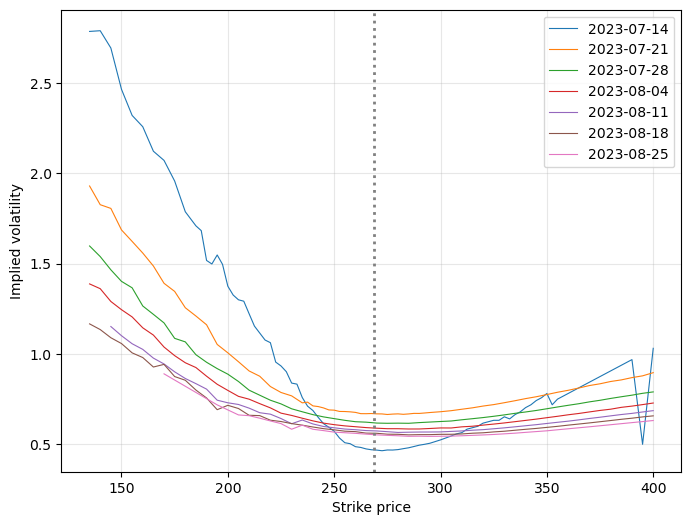

In [100]:
tk = yf.Ticker('TSLA')
exps = tk.options

spot = tk.history(period='1d')['Close'].values[0]

fig, ax = plt.subplots(figsize=(8, 6))

for i, e in enumerate(exps[:7]):
    opt =tk.option_chain(e).calls
    opt = opt.loc[opt['strike'].between(spot - spot/2, spot + spot/2)]

    vol_smile = pd.DataFrame(
        {
            'strike_price': opt['strike'],
            'implied_volatility': opt['impliedVolatility'],
            'volume': opt['volume']
        }
    )

    vol_smile.plot(x='strike_price', 
                   y='implied_volatility', 
                   ax=ax, label=e, linewidth=0.8)

ax.axvline(x=spot, linestyle=':', color='gray', linewidth=2)
ax.grid(alpha=0.3)
ax.set_xlabel('Strike price')
ax.set_ylabel('Implied volatility')